### Q.2 KNN Classifier : Mushroom Database

Mount google drive to read data

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).




> Create the KNN classifier class.

> Perform one-hot encoding of the categorical variables.

> Find accuracy for 5 values of k = [3,5,7,9,11]

> Plot the k vs Accuracy graph and observe optimum value of k for which it gives highest ccuracy.

> Print the classification report.











In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

def byfirst(elem):
    return elem[0]

class KNNClassifier:
    k = 3
    col_names = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attach', 'gill_spacing', 
                                'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surf_above', 
                                'stalk_surf_below', 'stalk_color_above', 'stalk_color_below', 'veil_type', 'veil_color',
                                'ring_number', 'ring_type', 'spore_color', 'population', 'habitat']

    col_attributes = [['b', 'c', 'x', 'f', 'k', 's'], ['f', 'g', 's', 'y'],['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'],
                  ['f', 't'], ['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], ['a', 'f', 'd', 'n'],['c', 'w', 'd'],
                  ['b', 'n'], ['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'], ['e', 't'],
                  ['b', 'c', 'e', 'r', 'u', 'z'], ['f', 'k', 's', 'y'], ['f', 'k', 's', 'y'], ['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'],
                  ['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], ['p', 'u'], ['n', 'o', 'w', 'y'], ['n', 'o', 't'],
                  ['e', 'f', 'l', 'n', 'p', 'c', 's', 'z'], ['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'], ['a', 'c', 'n', 's', 'v', 'y'],
                  ['d', 'g', 'l', 'm', 'p', 'u', 'w']]
    
    def _init_(self):
        self.train_df = pd.Dataframe()
        self.train_data = np.empty
        self.train_label = np.empty
        self.validation_df = pd.Dataframe()
        self.validation_data = np.empty
        self.validation_label = np.empty
        self.test_df = pd.Dataframe()
        self.test_data = np.empty
        self.test_label = np.empty
    
    def train(self, train_path):
        self.train_df = pd.read_csv(train_path, header=None)
        train_label_df = self.train_df.iloc[:,0]
        self.train_label = train_label_df.to_numpy()
        self.train_df = self.train_df.iloc[:,1:]
        
        self.train_df.columns = self.col_names
        for i in range(0,len(self.col_names)):
            self.train_df[self.col_names[i]] = pd.Categorical(self.train_df[self.col_names[i]],categories = self.col_attributes[i])

        self.train_df = self.train_df.replace(to_replace ="?", value =np.nan)
        for col in self.train_df.columns:
            self.train_df[col].fillna(self.train_df[col].mode()[0], inplace=True)
        
        self.train_df = pd.get_dummies(self.train_df)
        self.train_data = self.train_df.to_numpy()

    def getEncodedDf(self):
        return self.train_df
        
    def predict(self, test_path, test_labels):
        self.test_df = pd.read_csv(test_path, header=None)
        self.test_df.columns = self.col_names
        for i in range(0,len(self.col_names)):
            self.test_df[self.col_names[i]] = pd.Categorical(self.test_df[self.col_names[i]],categories = self.col_attributes[i])

        self.test_df = self.test_df.replace(to_replace ="?", value =np.nan)
        for col in self.test_df.columns:
            self.test_df[col].fillna(self.test_df[col].mode()[0], inplace=True)
            
        self.test_df = pd.get_dummies(self.test_df)
        self.test_data = self.test_df.to_numpy()
        
        k_lis = [3,5,7,9, 11]
        max_k=max(k_lis)
        euclid_success=[]
        manhatt_success=[]
        euclid_dist_mat = []
        manhatt_dist_mat=[]
        for q in range(0,len(self.test_data)):
            manhatt_dist_vec=[]
            euclid_dist_vec=[]
            for r in range(0,len(self.train_data)):
                x = self.test_data[q] - self.train_data[r]
                x = np.absolute(x)
                manhatt_dist = np.sum(x)
                manhatt_dist_vec.append((manhatt_dist, self.train_label[r]))
                manhatt_dist_vec.sort(key=byfirst)
                if (len(manhatt_dist_vec)>max_k):
                    manhatt_dist_vec.pop()
                
                x = x*x
                euclid_dist = np.sum(x)
                euclid_dist_vec.append((euclid_dist, self.train_label[r]))
                euclid_dist_vec.sort(key=byfirst)
                if (len(euclid_dist_vec)>max_k):
                    euclid_dist_vec.pop()
    
            manhatt_dist_mat.append(manhatt_dist_vec)
            euclid_dist_mat.append(euclid_dist_vec)
        
        manhatt_predict_label = []
        euclid_predict_label = []
        for i in k_lis:
            manhatt_succ_count=0
            euclid_succ_count=0
            manhatt_predict_tmp = []
            euclid_predict_tmp = []
            for j in range(0, len(self.test_data)):
                man_tmp_dist = manhatt_dist_mat[j][0:i]
                man_max_label=[x[1] for x in man_tmp_dist]
                man_predict_label=max(set(man_max_label), key=man_max_label.count)
                manhatt_predict_tmp.append(man_predict_label)
                if (test_labels[j]==man_predict_label):
                    manhatt_succ_count+=1

                euc_tmp_dist = euclid_dist_mat[j][0:i]
                euc_max_label=[x[1] for x in euc_tmp_dist]
                euc_predict_label=max(set(euc_max_label), key=euc_max_label.count)
                euclid_predict_tmp.append(euc_predict_label)
                if (test_labels[j]==euc_predict_label):
                    euclid_succ_count+=1
            manhatt_predict_label.append(manhatt_predict_tmp)
            euclid_predict_label.append(euclid_predict_tmp)
            manhatt_success.append((manhatt_succ_count/len(self.test_data))*100)
            euclid_success.append((euclid_succ_count/len(self.test_data))*100)
        plt.title("k-value vs Accuracy")
        plt.ylabel('Accuracy')
        plt.xlabel('k-value')
        plt.plot(k_lis,euclid_success,'b', label="Euc succ. rate")
        plt.plot(k_lis,manhatt_success,'g', label="Manhatt. succ. rate")
        plt.legend()
        plt.grid(True, color='k')
        plt.show()
        return euclid_predict_label[0]

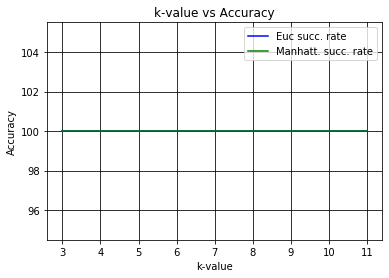

Classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       505
           p       1.00      1.00      1.00       495

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Accuracy score : 1.0
Confusion matrix
[[505   0]
 [  0 495]]


In [21]:
knn_classifier = KNNClassifier()
knn_classifier.train('/content/gdrive/My Drive/SMAI/Assignment-1/q2/train.csv')
test_labels = list()
with open("/content/gdrive/My Drive/SMAI/Assignment-1/q2/test_labels.csv") as f:
  for line in f:
    test_labels.append(line.strip())
predictions = knn_classifier.predict('/content/gdrive/My Drive/SMAI/Assignment-1/q2/test.csv', test_labels)
print ("Classification report:")
print(classification_report(test_labels,predictions))
print ("Accuracy score :", accuracy_score(test_labels, predictions))
print("Confusion matrix")
print(confusion_matrix(test_labels, predictions))



> Classification using Scikit-learn's KNN classifier.

> Perform validation and print confusion matrix, classification report and accuracy of Sci-kit's KNN classifier


In [23]:
train_data_frame = knn_classifier.getEncodedDf()
X = train_data_frame.iloc[:, 1:126].values        
Y = train_data_frame.iloc[:, 0].values         

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)
series_1 = pd.Series([X_train])
series_2 = pd.Series([Y_train])
dataframe1=pd.concat([series_1, series_2],axis=1)
neighbour = KNeighborsClassifier(n_neighbors=3)
neighbour.fit(X_train, Y_train)
p = neighbour.predict(X_test)
print ("Confusion_matrix :" )
print (confusion_matrix(Y_test,p))
print ("Classification report : ")
print (classification_report(Y_test,p))
print("Accuracy score : ")
print (accuracy_score(Y_test,p))

Confusion_matrix :
[[842  15]
 [ 17  26]]
Classification report : 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       857
           1       0.63      0.60      0.62        43

    accuracy                           0.96       900
   macro avg       0.81      0.79      0.80       900
weighted avg       0.96      0.96      0.96       900

Accuracy score : 
0.9644444444444444
